In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
A = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
print(A)

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [28]:
B = df[['Species']]
print(B)

Species
0       Iris-setosa
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[150 rows x 1 columns]


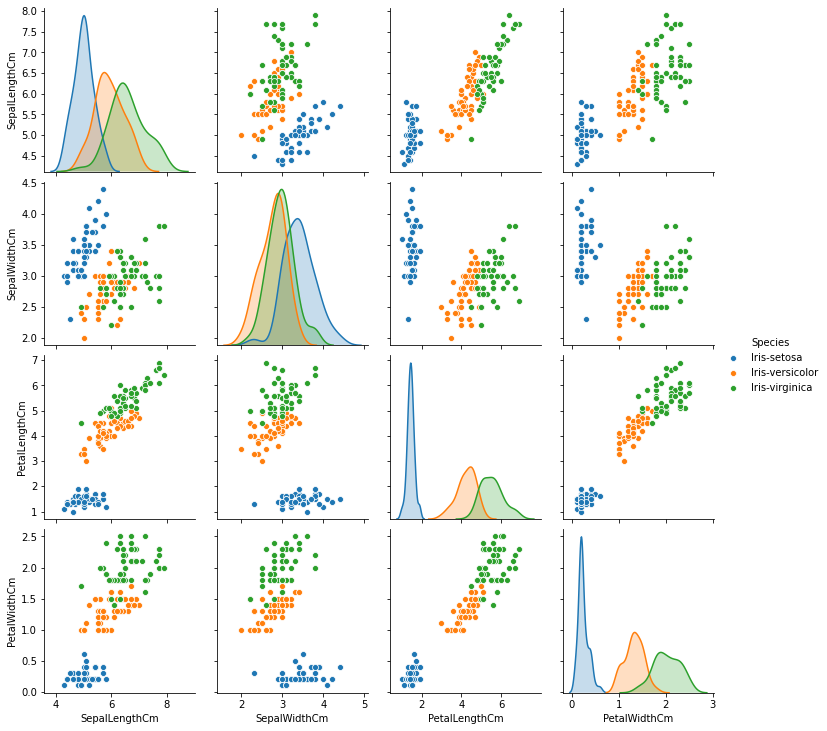

In [8]:
sns.pairplot(df.drop(labels=['Id'], axis=1), hue='Species')

In [10]:
# split data into training and test sets; set random state to 0 for reproducibility 
# X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']],df['Species'], random_state=0)

In [11]:
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [12]:
# initialize the Estimator object
knn = KNeighborsClassifier(n_neighbors=1)

In [13]:
# fit the model to training set in order to predict classes
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [14]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


In [29]:
dfXn1 = A[0:25]
dfXn2 = A[50:75]
dfXn3 = A[100:125]

dfXt1 = A[25:50]
dfXt2 = A[75:100]
dfXt3 = A[125:150]

dfyn1 = B[0:25]
dfyn2 = B[50:75]
dfyn3 = B[100:125]

dfyt1 = B[25:50]
dfyt2 = B[75:100]
dfyt3 = B[125:150]

X11_train = pd.concat([dfXn1,dfXn2,dfXn3])
X11_test = pd.concat([dfXt1,dfXt2,dfXt3])

y11_train = pd.concat([dfyn1,dfyn2,dfyn3])
y11_test = pd.concat([dfyt1,dfyt2,dfyt3])

print("X11_train shape: {}\ny11_train shape: {}".format(X11_train.shape, y11_train.shape))
print("X11_test shape: {}\ny11_test shape: {}".format(X11_test.shape, y11_test.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X11_train, y11_train)
print("Test set score: {:.6f}".format(knn.score(X11_test, y11_test)))
K11=knn.score(X11_test, y11_test)

X11_train shape: (75, 4)
y11_train shape: (75, 1)
X11_test shape: (75, 4)
y11_test shape: (75, 1)
Test set score: 0.946667


In [30]:
dfXt1 = A[0:25]
dfXt2 = A[50:75]
dfXt3 = A[100:125]

dfXn1 = A[25:50]
dfXn2 = A[75:100]
dfXn3 = A[125:150]

dfyt1 = B[0:25]
dfyt2 = B[50:75]
dfyt3 = B[100:125]

dfyn1 = B[25:50]
dfyn2 = B[75:100]
dfyn3 = B[125:150]

X12_train = pd.concat([dfXn1,dfXn2,dfXn3])
X12_test = pd.concat([dfXt1,dfXt2,dfXt3])

y12_train = pd.concat([dfyn1,dfyn2,dfyn3])
y12_test = pd.concat([dfyt1,dfyt2,dfyt3])

print("X12_train shape: {}\ny12_train shape: {}".format(X12_train.shape, y12_train.shape))
print("X12_test shape: {}\ny12_test shape: {}".format(X12_test.shape, y12_test.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X12_train, y12_train)
print("Test set score: {:.6f}".format(knn.score(X12_test, y12_test)))
K12=knn.score(X12_test, y12_test)

X12_train shape: (75, 4)
y12_train shape: (75, 1)
X12_test shape: (75, 4)
y12_test shape: (75, 1)
Test set score: 0.946667


In [31]:
dfXn1 = A[0:25]
dfXn2 = A[50:75]
dfXn3 = A[100:125]

dfXt1 = A[25:50]
dfXt2 = A[75:100]
dfXt3 = A[125:150]

dfyn1 = B[0:25]
dfyn2 = B[50:75]
dfyn3 = B[100:125]

dfyt1 = B[25:50]
dfyt2 = B[75:100]
dfyt3 = B[125:150]

X31_train = pd.concat([dfXn1,dfXn2,dfXn3])
X31_test = pd.concat([dfXt1,dfXt2,dfXt3])

y31_train = pd.concat([dfyn1,dfyn2,dfyn3])
y31_test = pd.concat([dfyt1,dfyt2,dfyt3])

print("X31_train shape: {}\ny31_train shape: {}".format(X31_train.shape, y31_train.shape))
print("X31_test shape: {}\ny31_test shape: {}".format(X31_test.shape, y31_test.shape))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X31_train, y31_train)
print("Test set score: {:.6f}".format(knn.score(X31_test, y31_test)))
K31=knn.score(X31_test, y31_test)

X31_train shape: (75, 4)
y31_train shape: (75, 1)
X31_test shape: (75, 4)
y31_test shape: (75, 1)
Test set score: 0.920000


In [32]:
dfXt1 = A[0:25]
dfXt2 = A[50:75]
dfXt3 = A[100:125]

dfXn1 = A[25:50]
dfXn2 = A[75:100]
dfXn3 = A[125:150]

dfyt1 = B[0:25]
dfyt2 = B[50:75]
dfyt3 = B[100:125]

dfyn1 = B[25:50]
dfyn2 = B[75:100]
dfyn3 = B[125:150]

X32_train = pd.concat([dfXn1,dfXn2,dfXn3])
X32_test = pd.concat([dfXt1,dfXt2,dfXt3])

y32_train = pd.concat([dfyn1,dfyn2,dfyn3])
y32_test = pd.concat([dfyt1,dfyt2,dfyt3])

print("X32_train shape: {}\ny32_train shape: {}".format(X32_train.shape, y32_train.shape))
print("X32_test shape: {}\ny32_test shape: {}".format(X32_test.shape, y32_test.shape))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X32_train, y32_train)
print("Test set score: {:.6f}".format(knn.score(X32_test, y32_test)))
K32=knn.score(X32_test, y32_test)

X32_train shape: (75, 4)
y32_train shape: (75, 1)
X32_test shape: (75, 4)
y32_test shape: (75, 1)
Test set score: 0.960000


In [34]:
print("當 K=1，且前半資料為 train， 後半資料為 test，CR值:" ,K11)
print("當 K=1，且前半資料為 test， 後半資料為 train，CR值:" ,K12)
print("所以 K1 平均 CR值:",(K11+K12)/2)

print("\n")

print("當 K=3，且前半資料為 train， 後半資料為 test，CR值:" ,K31)
print("當 K=3，且前半資料為 test， 後半資料為 train，CR值:" ,K32)
print("所以 K3 平均 CR值:",(K31+K32)/2)

當 K=1，且前半資料為 train， 後半資料為 test，CR值: 0.9466666666666667
當 K=1，且前半資料為 test， 後半資料為 train，CR值: 0.9466666666666667
所以 K1 平均 CR值: 0.9466666666666667


當 K=3，且前半資料為 train， 後半資料為 test，CR值: 0.92
當 K=3，且前半資料為 test， 後半資料為 train，CR值: 0.96
所以 K3 平均 CR值: 0.94
